In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from linearRegression import LinearRegression

In [2]:
duong_dan = 'car_detail_cleaned.csv'

In [3]:
df = pd.read_csv(duong_dan)

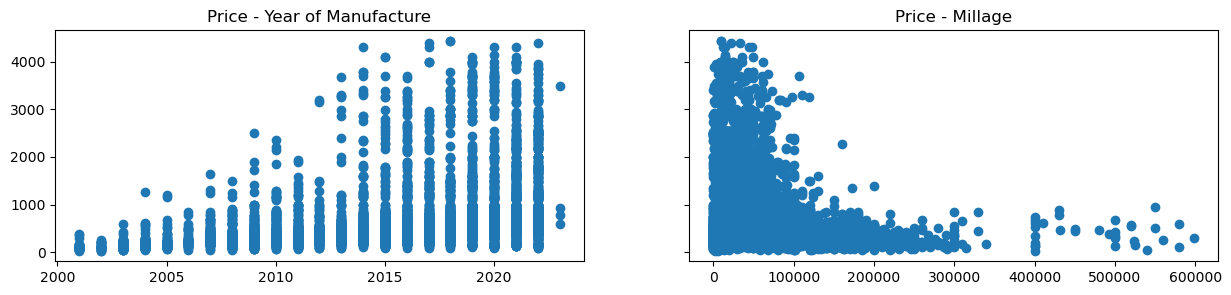

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(df['year_of_manufacture'],df['Price'])
ax1.set_title('Price - Year of Manufacture')
ax2.scatter(df['mileage'],df['Price'])
ax2.set_title('Price - Millage')
plt.show()

In [5]:
log_price = np.log(df['Price'])
df['log_price'] = log_price
df

,origin,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,transmission,drive_type,fuel_consumption,grade,year_of_manufacture,car_name,Price,log_price
0,Domestic assembly,Crossover,62000.0,Sand,gray,5,8,Petrol\t2.0 L,Manual,RFD - Rear-wheel drive,7\tL/100Km,Innova,2016.0,Toyota Innova 2.0E 2016 car,368.0,5.908083
1,Imported,SUV,83000.0,White,Black,5,5,Petrol\t2.0 L,Automatic,FWD - Front-wheel drive,7\tL/100Km,CRV,2011.0,Honda CRV 2.0 AT 2011,438.0,6.082219
2,Imported,Van/Minivan,150000.0,Silver,-,4,16,Petrol\t2.7 L,Manual,RFD - Rear-wheel drive,9\tL/100Km,Hiace,2015.0,Toyota Hiace 2.7 2015,540.0,6.291569
3,Imported,Bán tải / Pickup,60000.0,Black,Cream,4,5,Diesel\t2.8 L,Automatic,4WD - Four-wheel drive (4WD),7\tL/100Km,Colorado,2015.0,Chevrolet Colorado LTZ 2.8L 4x4 AT 2015,479.0,6.171701
4,Imported,Sedan,170000.0,Black,Cream,4,5,Petrol\t3.5 L,Automatic,AWD - 4-wheel drive (AWD),11\tL/100Km,GS,2009.0,Lexus GS 350 AWD 2009,760.0,6.633318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,Imported,SUV,9.0,Black,Black,5,8,Diesel,Automatic,4WD - Four-wheel drive (4WD),6\tL/100Km,Rexton,2006.0,Ssangyong Rexton 2.5 2006,195.0,5.273000
8247,Domestic assembly,Crossover,75000.0,White,Grey,5,5,Petrol,Automatic,FWD - Front-wheel drive,7\tL/100Km,EcoSport,2016.0,Ford EcoSport Titanium 2016,415.0,6.028279
8248,Domestic assembly,Sedan,21000.0,Copper,Cream,4,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,Vios,2018.0,Toyota Vios 1.5G 2018,430.0,6.063785
8249,Domestic assembly,SUV,38000.0,White,Black,5,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,i10,2021.0,Hyundai i10 1.2 AT 2021 car,395.0,5.978886


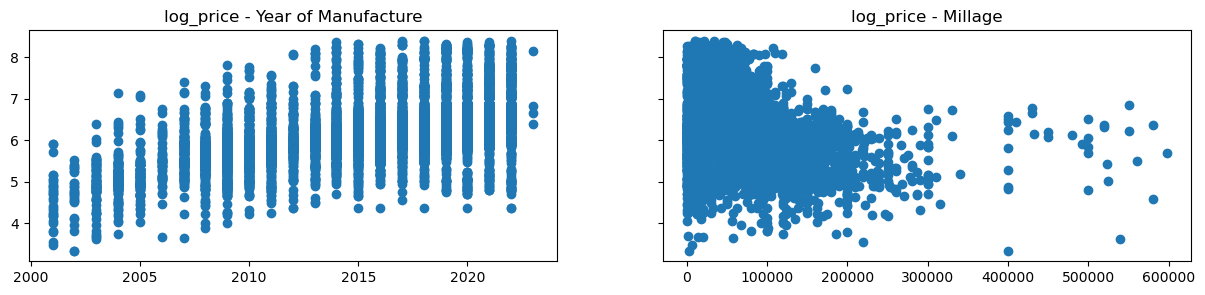

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(df['year_of_manufacture'],df['log_price'])
ax1.set_title('log_price - Year of Manufacture')
ax2.scatter(df['mileage'],df['log_price'])
ax2.set_title('log_price - Millage')
plt.show()

In [7]:
df

,origin,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,transmission,drive_type,fuel_consumption,grade,year_of_manufacture,car_name,Price,log_price
0,Domestic assembly,Crossover,62000.0,Sand,gray,5,8,Petrol\t2.0 L,Manual,RFD - Rear-wheel drive,7\tL/100Km,Innova,2016.0,Toyota Innova 2.0E 2016 car,368.0,5.908083
1,Imported,SUV,83000.0,White,Black,5,5,Petrol\t2.0 L,Automatic,FWD - Front-wheel drive,7\tL/100Km,CRV,2011.0,Honda CRV 2.0 AT 2011,438.0,6.082219
2,Imported,Van/Minivan,150000.0,Silver,-,4,16,Petrol\t2.7 L,Manual,RFD - Rear-wheel drive,9\tL/100Km,Hiace,2015.0,Toyota Hiace 2.7 2015,540.0,6.291569
3,Imported,Bán tải / Pickup,60000.0,Black,Cream,4,5,Diesel\t2.8 L,Automatic,4WD - Four-wheel drive (4WD),7\tL/100Km,Colorado,2015.0,Chevrolet Colorado LTZ 2.8L 4x4 AT 2015,479.0,6.171701
4,Imported,Sedan,170000.0,Black,Cream,4,5,Petrol\t3.5 L,Automatic,AWD - 4-wheel drive (AWD),11\tL/100Km,GS,2009.0,Lexus GS 350 AWD 2009,760.0,6.633318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,Imported,SUV,9.0,Black,Black,5,8,Diesel,Automatic,4WD - Four-wheel drive (4WD),6\tL/100Km,Rexton,2006.0,Ssangyong Rexton 2.5 2006,195.0,5.273000
8247,Domestic assembly,Crossover,75000.0,White,Grey,5,5,Petrol,Automatic,FWD - Front-wheel drive,7\tL/100Km,EcoSport,2016.0,Ford EcoSport Titanium 2016,415.0,6.028279
8248,Domestic assembly,Sedan,21000.0,Copper,Cream,4,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,Vios,2018.0,Toyota Vios 1.5G 2018,430.0,6.063785
8249,Domestic assembly,SUV,38000.0,White,Black,5,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,i10,2021.0,Hyundai i10 1.2 AT 2021 car,395.0,5.978886


In [8]:
df_to_encode = df

In [9]:
from sklearn.preprocessing import TargetEncoder
target_encoder = TargetEncoder()
categorical_cols = [
    'origin', 'car_model', 'exterior_color', 'interior_color',
    'num_of_doors', 'seating_capacity', 'engine', 'transmission',
    'drive_type','grade', 'fuel_consumption', 'car_name'
]
df_to_encode[categorical_cols] = target_encoder.fit_transform(df_to_encode[categorical_cols], df_to_encode['log_price'])

# Rename the encoded columns to have a suffix like '_target_encoded' for clarity
encoded_col_names = {col: col + '_target_encoded' for col in categorical_cols if col in df_to_encode.columns}
df_to_encode = df_to_encode.rename(columns=encoded_col_names)

In [10]:
df_to_encode

,origin_target_encoded,car_model_target_encoded,mileage,exterior_color_target_encoded,interior_color_target_encoded,num_of_doors_target_encoded,seating_capacity_target_encoded,engine_target_encoded,transmission_target_encoded,drive_type_target_encoded,fuel_consumption_target_encoded,grade_target_encoded,year_of_manufacture,car_name_target_encoded,Price,log_price
0,6.122011,6.225841,62000.0,5.993271,5.760981,6.236864,6.036491,6.520685,5.578353,6.330411,6.211594,6.019250,2016.0,6.016070,368.0,5.908083
1,6.309511,6.485162,83000.0,6.308468,6.275228,6.223189,6.185908,6.508391,6.348962,6.019812,6.221224,6.486928,2011.0,5.986452,438.0,6.082219
2,6.314329,5.753891,150000.0,5.805070,5.926215,6.155354,5.697138,6.521610,5.578353,6.330411,6.308936,4.973129,2015.0,6.196578,540.0,6.291569
3,6.313595,6.263542,60000.0,6.302710,6.236311,6.154907,6.180263,6.463224,6.351720,6.277439,6.222845,6.199248,2015.0,6.098074,479.0,6.171701
4,6.313595,6.136483,170000.0,6.302710,6.236311,6.154907,6.180263,6.986479,6.351720,7.051757,6.450421,6.679920,2009.0,6.197852,760.0,6.633318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,6.309511,6.485162,9.0,6.314240,6.275228,6.223189,6.052345,5.869908,6.348962,6.252170,6.068800,6.194316,2006.0,6.194316,195.0,5.273000
8247,6.126484,6.200695,75000.0,6.309136,5.853671,6.235856,6.187777,6.147955,6.354200,6.020821,6.211474,6.102525,2016.0,6.196733,415.0,6.028279
8248,6.123742,6.152039,21000.0,6.298238,6.226329,6.167276,6.185908,6.160040,6.348962,6.019812,6.068800,5.931155,2018.0,6.121533,430.0,6.063785
8249,6.126484,6.493723,38000.0,6.309136,6.279580,6.235856,6.187777,6.147955,6.354200,6.020821,6.075385,5.752887,2021.0,6.016842,395.0,5.978886


In [11]:
df_to_encode.sample(10).T

,4014,4883,6770,7823,7180,2952,6568,5687,7069,6261
origin_target_encoded,6.122612,6.125996,6.314384,6.122612,6.122011,6.122011,6.126484,6.314384,6.123742,6.123742
car_model_target_encoded,6.140691,6.136483,6.252029,6.140691,6.143430,6.494332,6.147466,5.671067,6.152039,6.205189
mileage,50000.000000,68000.000000,17000.000000,46000.000000,50000.000000,210000.000000,121000.000000,91000.000000,100000.000000,32000.000000
exterior_color_target_encoded,6.308829,6.309887,6.315563,5.824115,6.310458,5.805070,5.813970,6.110136,5.814481,6.308468
interior_color_target_encoded,6.273788,6.275187,6.273788,6.241516,6.273601,5.673147,6.224348,6.241516,5.753678,6.275228
num_of_doors_target_encoded,6.154566,6.154907,6.154566,6.154566,6.155354,6.236864,6.157266,6.240094,6.167276,6.223189
seating_capacity_target_encoded,6.186483,6.180263,6.186483,6.186483,6.184805,6.036491,6.187777,6.186483,6.185908,6.185908
engine_target_encoded,6.156673,6.146393,6.240547,5.997605,6.152324,5.972424,6.152713,5.895359,6.004198,5.925152
transmission_target_encoded,6.350986,6.351720,5.589246,5.589246,6.353372,5.578353,6.354200,6.350986,5.585519,6.348962
drive_type_target_encoded,6.022320,6.020375,6.273256,6.022320,6.018748,6.330411,6.020821,6.022320,6.019812,6.019812


In [12]:
df_to_encode.columns

Index(['origin_target_encoded', 'car_model_target_encoded', 'mileage',
       'exterior_color_target_encoded', 'interior_color_target_encoded',
       'num_of_doors_target_encoded', 'seating_capacity_target_encoded',
       'engine_target_encoded', 'transmission_target_encoded',
       'drive_type_target_encoded', 'fuel_consumption_target_encoded',
       'grade_target_encoded', 'year_of_manufacture',
       'car_name_target_encoded', 'Price', 'log_price'],
      dtype='object')

In [13]:
df_to_encode.to_csv('dataset.csv', index=False)  

In [14]:
df_to_encode.isnull().sum()


origin_target_encoded              0
car_model_target_encoded           0
mileage                            0
exterior_color_target_encoded      0
interior_color_target_encoded      0
num_of_doors_target_encoded        0
seating_capacity_target_encoded    0
engine_target_encoded              0
transmission_target_encoded        0
drive_type_target_encoded          0
fuel_consumption_target_encoded    0
grade_target_encoded               0
year_of_manufacture                0
car_name_target_encoded            0
Price                              0
log_price                          0
dtype: int64